## Горизонт частиц и CPL-модель тёмной энергии

Горизонт частиц — это *сопутствующее* расстояние, с которого свет мог добраться до нас за всё время существования Вселенной:

$$
\chi_{\text{hor}} = c \int_0^{t_0} \frac{dt}{a(t)} = c \int_0^{\infty} \frac{dz}{H(z)}.
$$

---

### CPL-параметризация $ w(z) $

В плоской $ w_0 w_a $CDM-модели (Chevallier–Polarski–Linder) уравнение состояния тёмной энергии:

$$
w(z) = w_0 + w_a \frac{z}{1+z}.
$$

Плотность тёмной энергии эволюционирует как:

$$
\rho_{\text{DE}}(z) = \rho_{\text{DE},0} \cdot E_{\text{DE}}(z), 
\quad\text{где}\quad
E_{\text{DE}}(z) = \exp\!\left[3\int_0^z \frac{1 + w(z')}{1 + z'}\,dz'\right].
$$

Аналитически:

$$
\int_0^z \frac{1 + w(z')}{1 + z'}\,dz'
= (1 + w_0 + w_a)\ln(1+z) - w_a \frac{z}{1+z},
$$

поэтому:

$$
E_{\text{DE}}(z) = (1+z)^{3(1 + w_0 + w_a)} \cdot \exp\!\left[-3 w_a \frac{z}{1+z}\right].
$$

---

### Функция Хаббла в CPL-модели

С учётом вкладов материи, излучения и тёмной энергии:

$$
H(z) = H_0 \sqrt{
\Omega_m (1+z)^3
+ \Omega_r (1+z)^4
+ \underbrace{(1 - \Omega_m - \Omega_r)}_{\Omega_{\text{DE}}} \cdot (1+z)^{3(1 + w_0 + w_a)} \exp\!\Bigl[-3 w_a \tfrac{z}{1+z}\Bigr]
}.
$$

- $\Omega_r \approx 9.2 \times 10^{-5} \cdot h^{-2} \approx 9.2 \times 10^{-5}$ при $h = 0.68$  
- $\Omega_k = 0$ (плоская Вселенная)  
- $\Omega_{\text{DE}} = 1 - \Omega_m - \Omega_r \approx 1 - \Omega_m$

---

### Численное интегрирование

На практике вычисляем:

$$
\chi_{\text{hor}} = c \int_{0}^{z_{\max}} \frac{dz}{H(z)},
\quad z_{\max} \sim 10^4\text{--}10^5,
$$

т.к. при $z \gg 5000$ вклад радиационной эры уже пренебрежимо мал.

Вычисление горизонта частиц...

ΛCDM (Planck):
  χ_hor = 14.140 Гпк = 46.12 млрд св. лет

Авторы (corrected):
  χ_hor = 13.067 Гпк = 42.62 млрд св. лет

Разница: +-7.59% по радиусу, +-7.59% в св. годах


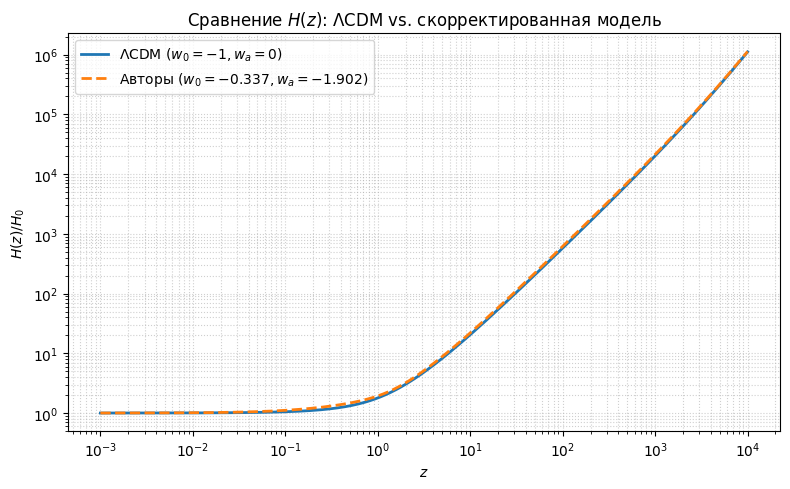


Модель                    χ (Гпк)    R (млрд св. лет)
------------------------------------------------------------
ΛCDM (Planck)             14.140     46.12          
Авторы (corrected)        13.067     42.62          


In [4]:
# -*- coding: utf-8 -*-
import numpy as np
from scipy.integrate import quad
from astropy.constants import c
from astropy.cosmology import FlatLambdaCDM
import matplotlib.pyplot as plt

# Константы
c_km_s = c.to('km/s').value  # скорость света в км/с

# ---- Вспомогательные функции ----

def Hz_cpl(z, H0, Om, Or, w0, wa):
    """
    H(z) в CPL-модели (w0waCDM)
    z — скаляр или массив
    возвращает H(z) в км/с/Мпк
    """
    z = np.asarray(z)
    a = 1.0 / (1.0 + z)
    # CPL-фактор эволюции плотности тёмной энергии:
    # rho_DE(z)/rho_DE(0) = (1+z)^{3(1+w0+wa)} * exp(-3*wa*z/(1+z))
    exponent = 3 * (1 + w0 + wa) * np.log(1 + z) - 3 * wa * z / (1 + z)
    E2 = (
        Om * (1 + z)**3
        + Or * (1 + z)**4
        + (1 - Om - Or) * np.exp(exponent)
    )
    return H0 * np.sqrt(E2)

def chi_horizon_cpl(H0, Om, w0, wa, Or=9.2e-5, z_max=1e5):
    """
    Вычисляет сопутствующий горизонт частиц в Мпк
    """
    integrand = lambda z: c_km_s / Hz_cpl(z, H0, Om, Or, w0, wa)
    val, err = quad(integrand, 0, z_max, epsabs=1e-4, epsrel=1e-4, limit=200)
    return val  # в Мпк

# ---- Параметры моделей ----

# Планковский ΛCDM (для сравнения)
H0_planck = 67.4    # km/s/Mpc (Planck 2018 TT,TE,EE+lowE+lensing)
Om_planck = 0.315
w0_planck = -1.0
wa_planck = 0.0

# Модель авторов (скорректированный BAO+CMB+DES5Y)
# Из Table 2: BAO+CMB+DES5Y(corrected)
H0_test = 68.0      # условно; фактически H0 не фиксирован — но χ ∝ 1/H0
Om_test = 0.363
w0_test = -0.337
wa_test = -1.902

# ---- Расчёты ----

print("Вычисление горизонта частиц...")

chi_planck = chi_horizon_cpl(H0_planck, Om_planck, w0_planck, wa_planck)
chi_test   = chi_horizon_cpl(H0_test,   Om_test,   w0_test,   wa_test)

# Перевод в Гпк и световые годы
chi_planck_Gpc = chi_planck / 1e3
chi_test_Gpc   = chi_test   / 1e3

ly_per_Mpc = 3.26156e6  # световых лет в 1 Мпк
chi_planck_ly = chi_planck * ly_per_Mpc
chi_test_ly   = chi_test   * ly_per_Mpc

print(f"\nΛCDM (Planck):")
print(f"  χ_hor = {chi_planck_Gpc:.3f} Гпк = {chi_planck_ly/1e9:.2f} млрд св. лет")

print(f"\nАвторы (corrected):")
print(f"  χ_hor = {chi_test_Gpc:.3f} Гпк = {chi_test_ly/1e9:.2f} млрд св. лет")

print(f"\nРазница: +{(chi_test_Gpc - chi_planck_Gpc)/chi_planck_Gpc*100:.2f}% "
      f"по радиусу, +{(chi_test_ly - chi_planck_ly)/chi_planck_ly*100:.2f}% в св. годах")

# ---- Опционально: график H(z)/H0 для сравнения ----

z_plot = np.logspace(-3, 4, 500)
Hz_norm_planck = Hz_cpl(z_plot, 100, Om_planck, Or=9.2e-5, w0=w0_planck, wa=wa_planck) / 100
Hz_norm_test   = Hz_cpl(z_plot, 100, Om_test,   Or=9.2e-5, w0=w0_test,   wa=wa_test)   / 100

plt.figure(figsize=(8,5))
plt.loglog(z_plot, Hz_norm_planck, label=r'ΛCDM ($w_0=-1, w_a=0$)', lw=2)
plt.loglog(z_plot, Hz_norm_test,   label=rf'Авторы ($w_0={w0_test}, w_a={wa_test}$)', lw=2, ls='--')
plt.xlabel('$z$')
plt.ylabel('$H(z)/H_0$')
plt.title('Сравнение $H(z)$: ΛCDM vs. скорректированная модель')
plt.grid(True, which="both", ls=":", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# ---- Вывод таблицы ----
print("\n" + "="*60)
print(f"{'Модель':<25} {'χ (Гпк)':<10} {'R (млрд св. лет)':<15}")
print("-"*60)
print(f"{'ΛCDM (Planck)':<25} {chi_planck_Gpc:<10.3f} {chi_planck_ly/1e9:<15.2f}")
print(f"{'Авторы (corrected)':<25} {chi_test_Gpc:<10.3f} {chi_test_ly/1e9:<15.2f}")
print("="*60)

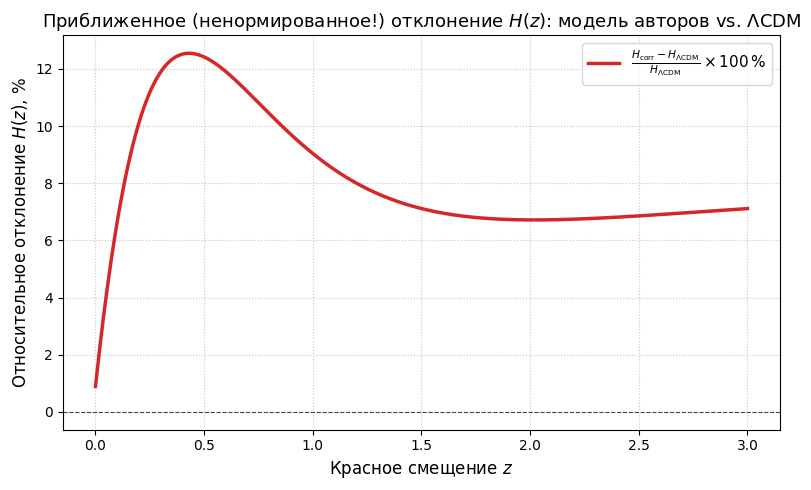

In [6]:
# ---- Дополнительный график: относительное отклонение H(z) в % ----

z_lin = np.linspace(0, 3.0, 500)  # линейная сетка — удобнее для восприятия

H_planck = Hz_cpl(z_lin, H0_planck, Om_planck, Or=9.2e-5, w0=w0_planck, wa=wa_planck)
H_test   = Hz_cpl(z_lin, H0_test,   Om_test,   Or=9.2e-5, w0=w0_test,   wa=wa_test)

# Относительное отклонение в процентах
delta_H_percent = (H_test - H_planck) / H_planck * 100.0

plt.figure(figsize=(8, 5))
plt.plot(z_lin, delta_H_percent, color='tab:red', lw=2.5,
         label=r'$\frac{H_{\text{corr}} - H_{\Lambda\text{CDM}}}{H_{\Lambda\text{CDM}}} \times 100\,\%$')
plt.axhline(0, color='k', lw=0.8, ls='--', alpha=0.7)
plt.xlabel(r'Красное смещение $z$', fontsize=12)
plt.ylabel(r'Относительное отклонение $H(z)$, %', fontsize=12)
plt.title(r'Приближенное (ненормированное!) отклонение $H(z)$: модель авторов vs. $\Lambda$CDM', fontsize=13)
plt.grid(True, ls=':', alpha=0.7)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()